<a href="https://colab.research.google.com/github/Yen-hub/AI4E/blob/main/%204-layer%20Multi-Layer-Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing a Simple MLP

## Import the Necessary Libraries

In [1]:
import torch
import torchvision
import numpy as np
from tqdm import tqdm
import torch.nn.functional as F
from torchsummary import summary
from matplotlib.pyplot import plot
from matplotlib import pyplot as plt
import torchvision.transforms as transforms

In [2]:
# Run on a GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Device: ", device)

Device:  cpu


In [3]:
seed = 42
epochs = 12
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

# Download the CIFAR 10 Dataset

In [4]:
# Get the training data and create a transform to ensure the data is made up of tensors
# why are we not normalizing the data between 0 and 1?
transform = transforms.Compose([transforms.ToTensor()])
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download = True, transform=transform)

# load the training data and transform it
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True, num_workers=2)

# Get the test data
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download = True, transform=transform)

# Now load the test data with a batch size of 32: Do we need to shuffle the test data?
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=2)


100%|██████████| 170M/170M [00:06<00:00, 26.9MB/s]


## Building the Model

In [5]:
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        ## TODO: Define the fully connected layers
        # Input layer (32*32*3 = 3072 nodes)
        self.fc1 = torch.nn.Linear(32*32*3, 512)
        self.fc2 = torch.nn.Linear(512, 256)
        self.fc3 = torch.nn.Linear(256, 128)
        self.fc4 = torch.nn.Linear(128, 10)

    def forward(self, x):
        # Flatten the input image
        x = torch.nn.Flatten()(x)

        ## TODO Pass through each layer with ReLU activations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)


        # Output layer (Softmax for class probabilities)
        return F.softmax(x, dim=1)


# Display a summary the model
mlp_model = MLP()
summary(mlp_model, (3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]       1,573,376
            Linear-2                  [-1, 256]         131,328
            Linear-3                  [-1, 128]          32,896
            Linear-4                   [-1, 10]           1,290
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.01
Params size (MB): 6.63
Estimated Total Size (MB): 6.65
----------------------------------------------------------------


## Loss Function and Optimizer

In [6]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp_model.parameters(), lr=0.0005)

## Train Function

In [7]:
def train(dataloader, model, criterion, optimizer):
    model.train()
    batch_bar = tqdm(total=len(dataloader), position=0, leave=False, dynamic_ncols=True, desc='Train')
    total_loss = 0
    total_accuracy = 0

    for i, (imgs, labels) in enumerate(dataloader):
        # zero the parameter gradients
        optimizer.zero_grad()
        ## TODO: forward pass
        outputs = model(imgs)

        # calculate the loss
        loss = criterion(outputs, labels)

        ## TODO backward pass
        loss.backward()

        # update the optimizer
        optimizer.step()

        # calculate the accuracy
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_accuracy += (predicted == labels).sum().item()
        # update the progress bar
        batch_bar.update()
    batch_bar.close()
    return total_loss/len(dataloader), 100*total_accuracy/(len(dataloader)*32)


## Evaluate Function

In [8]:
def evaluate(dataloader, model):
    model.eval()
    # write your code for the evaluate function
    total_loss = 0
    total_accuracy = 0
    batch_bar = tqdm(total=len(dataloader), position=0, leave=False, dynamic_ncols=True, desc='Evaluate')
    with torch.no_grad():
        for i, (imgs, labels) in enumerate(dataloader):
            # forward pass
            outputs = model(imgs)
            # calculate the loss
            loss = criterion(outputs, labels)
            # calculate the accuracy
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_accuracy += (predicted == labels).sum().item()
            # update the progress bar
            batch_bar.update()
    batch_bar.close()
    return total_loss/len(dataloader), 100*total_accuracy/(len(dataloader)*32)



## Train the MLP

In [9]:
losses = []
accs = []
for epoch in range(0, epochs):
    train_loss, train_acc = train(train_dataloader, mlp_model, criterion, optimizer)
    losses.append(train_loss)
    accs.append(train_acc)
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f} - Train Accuracy: {train_acc:.4f}")

Epoch 1/12 - Train Loss: 2.1718 - Train Accuracy: 27.5112


Epoch 2/12 - Train Loss: 2.1155 - Train Accuracy: 33.5893


Epoch 3/12 - Train Loss: 2.0968 - Train Accuracy: 35.5966


Epoch 4/12 - Train Loss: 2.0849 - Train Accuracy: 36.8022


Epoch 5/12 - Train Loss: 2.0739 - Train Accuracy: 37.9319


Epoch 6/12 - Train Loss: 2.0672 - Train Accuracy: 38.7036


Epoch 7/12 - Train Loss: 2.0550 - Train Accuracy: 39.9832


Epoch 8/12 - Train Loss: 2.0467 - Train Accuracy: 40.7989


Epoch 9/12 - Train Loss: 2.0424 - Train Accuracy: 41.2048


Epoch 10/12 - Train Loss: 2.0323 - Train Accuracy: 42.3744


Epoch 11/12 - Train Loss: 2.0306 - Train Accuracy: 42.5564


Epoch 12/12 - Train Loss: 2.0226 - Train Accuracy: 43.3781


## Plot the Train Losses and Train Accuracy Values

In [10]:
import torch
import torchvision
import numpy as np
from tqdm import tqdm
import torch.nn.functional as F
from torchsummary import summary
from matplotlib.pyplot import plot
from matplotlib import pyplot as plt
import torchvision.transforms as transforms

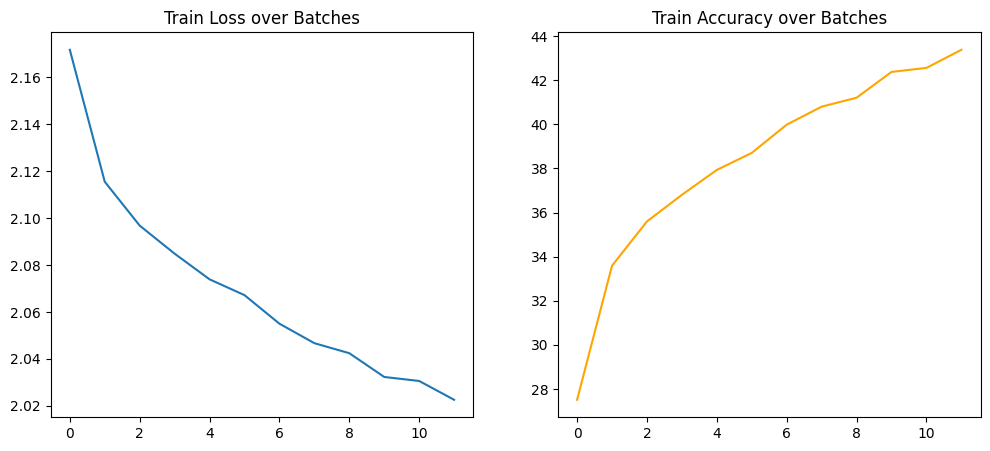

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Train Loss')
plt.title('Train Loss over Batches')
plt.subplot(1, 2, 2)
plt.plot(accs, label='Train Accuracy', color='orange')
plt.title('Train Accuracy over Batches')
plt.show()

## Test Loss & Accuracy

In [12]:
test_acc = evaluate(test_dataloader, mlp_model)
test_acc

(2.0301854176262317, 42.23242811501598)